<a href="https://colab.research.google.com/github/soyudea/Laboratorio_Modelo_Jesus_tamayo/blob/main/Copia_de_siMULACI%C3%93N_MONTECARLO_TALLER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SE INSTALAN LAS LIBRERÍAS**

In [ ]:
!pip install pandas.compat  #Facilita la presentación de los datos que se extraen desde la red
!pip install pandas_montecarlo  #Para realizar muestreo enfatizado desde varias fuentes
!pip install pandas.datareader  #Para extraer información de varias fuentes (Datos financieros)


  Created wheel for pandas-montecarlo: filename=pandas_montecarlo-0.0.2-py3-none-any.whl size=7565 sha256=40fdaab4091102e520924670adf7aebf3d19ed49bfda5125fc12ce76c9a9ee60
  Stored in directory: /root/.cache/pip/wheels/0e/45/c4/645c79733e2ba8dce5e8f52b3dbd8fe43bf8b400f1bf483707
Successfully built pandas-montecarlo


**SE CARGA LA BASE DE DATOS Y SE REALIZA LOS IMPORT**

In [ ]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import pandas_montecarlo

pd.compat.binary_type = bytes
start ='2017-12-01'
end = '2019-12-01'
f= web.DataReader('USD000UTSTOM','moex',start,end)
f.tail()

,BOARDID,CLOSE,HIGH,LOW,NUMTRADES,OPEN,SECID,SHORTNAME,VOLRUR,WAPRICE
TRADEDATE,,,,,,,,,,
2019-11-28,CNGD,64.0675,64.1924,63.9075,4431,64.0000,USD000UTSTOM,USDRUB_TOM,4.497012e+09,NaN
2019-11-28,LICU,0.0000,0.0000,0.0000,0,0.0000,USD000UTSTOM,USDRUB_TOM,0.000000e+00,NaN
2019-11-29,CETS,64.3175,64.3475,64.0025,22001,64.0975,USD000UTSTOM,USDRUB_TOM,1.174056e+11,64.1702
2019-11-29,CNGD,64.3150,65.5223,62.7984,11484,64.0800,USD000UTSTOM,USDRUB_TOM,5.925871e+10,NaN
2019-11-29,LICU,0.0000,0.0000,0.0000,0,0.0000,USD000UTSTOM,USDRUB_TOM,0.000000e+00,NaN


In [ ]:
OPEN_CLOSE = f.filter(regex = '(OPEN|CLOSE)')
OPEN_CLOSE['Incremento'] = OPEN_CLOSE['OPEN']-OPEN_CLOSE['CLOSE']
OPEN_CLOSE.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CLOSE,OPEN,Incremento
TRADEDATE,,,
2017-12-01,58.8800,58.5400,-0.3400
2017-12-01,58.8925,58.6200,-0.2725
2017-12-04,58.8075,58.9700,0.1625
2017-12-04,58.6850,58.8700,0.1850
2017-12-05,58.7500,58.8025,0.0525


## **10 simulaciones y bust = -0.2 : 0.05**

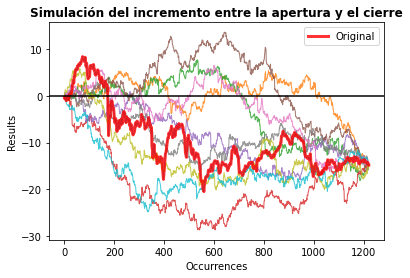

In [ ]:
M_C = OPEN_CLOSE['Incremento'].montecarlo(sims=10, bust=-0.2, goal=0.1)
M_C.plot(title="Simulación del incremento entre la apertura y el cierre")